#EXERCISE 3.1

###Brownian motions and European Option prices

Call and Put options are contracts on the Market with which a person (the buyer) gains the right of selling or buying an asset at an established price $K$, while the seller accepts in turn the decision of the buyer, whichever it may be. In European options the buyer can exercise his right only after some time $T$.

The buyer profits (and therefore calls the option) only if, at the time $T$, the market price $S(T)$ is higher than the option price $K$. Viceversa, the buyer will sell the option (put option). In the first case, the buyer profits $S-K$, while in the second, he profits $K-S$

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$. We must therefore be able to simulate Brownian Motions, and Geometric Brownian Motions:

A Brownian motion $W(t)$, also called a Wiener process, is a continuous-time stochastic process with the following properties:

*   $B(0) = 0$
*   Independent and tationary increments: $B(t') - B(t)$ and are independent of previous values, and their distribution depends only on $t' - t$
*   $B(t') - B(t)$ are normally distributed with mean 0 and variance $(t'-t)$


The geometric brownian motion is a time continuos stochastic process in which the logarithm of a randomly varying quantity, follows a Wiener process with drift.

$dS(t) = \mu S(t)dt + \sigma S(t)dW(t)$

$d (ln(S(t))) = (\mu - \frac{σ^2}{2})dt + \sigma dW(t)$

<ipython-input-3-8ca44b639bfd>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("BM_simulation.dat", delim_whitespace=True, header=None, names=["t", "w", "s"])


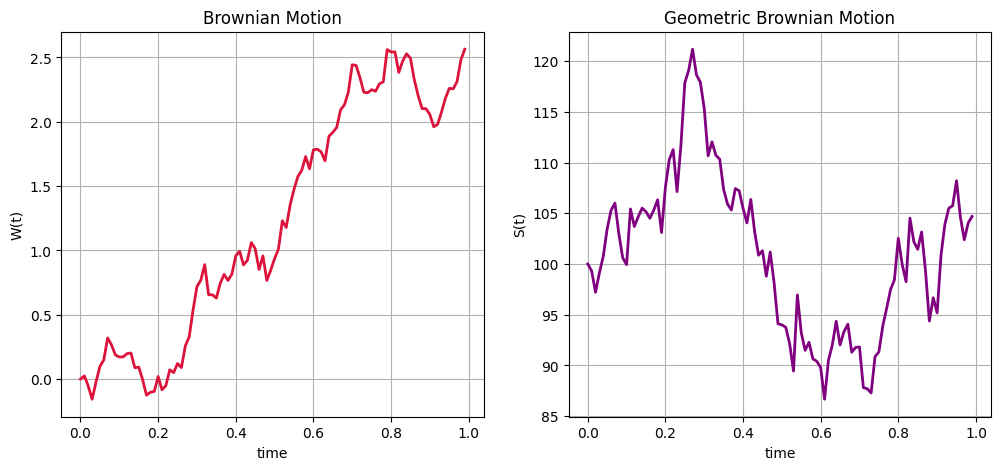

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#input data:
df = pd.read_csv("BM_simulation.dat", delim_whitespace=True, header=None, names=["t", "w", "s"])

#plot:
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(df["t"], df["w"], color='crimson', linewidth=2)
ax[0].set(xlabel = 'time', ylabel = r'W(t)', title = r'Brownian Motion')
ax[0].grid(True)

ax[1].plot(df["t"], df["s"], color='purple', linewidth=2)
ax[1].set(xlabel = 'time', ylabel = r'S(t)', title = r'Geometric Brownian Motion')
ax[1].grid(True)

plt.show()
plt.close()

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

In [ ]:
import scipy
from scipy.special import erf
from numpy import exp
from numpy.lib.scimath import log, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call, put = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call)
    print("put: ", put)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


There are two ways to compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:


*   by **direct sampling** calculation of $S(T)$ at the time $T$: $S(T) = S(0) \exp\left[ \left(\mu - \frac{1}{2}\sigma^2\right)T + \sigma W(T) \right]
$
where $ ( W(t) \sim \mathcal{N}(0, T) ) $.
*   by step-by-step (with n=100 steps, for example) sampling the **discretized GMB** up until  $t = T$:  $
S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu - \frac{1}{2}\sigma^2\right)(t_{i+1} - t_i)
+ \sigma Z_{i+1} \sqrt{t_{i+1} - t_i} \right]
$, with $( Z_i \sim \mathcal{N}(0, 1) )$.

Results are calculated using data blocking of 10000 points in 100 blocks

<ipython-input-23-e98562e9aaed>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("EuropeanOptions.dat", delim_whitespace=True, header=None, names=["C_direct", "err_C_direct", "P_direct", "err_P_direct", "C_discrete", "err_C_discrete", "P_discrete", "err_P_discrete"])


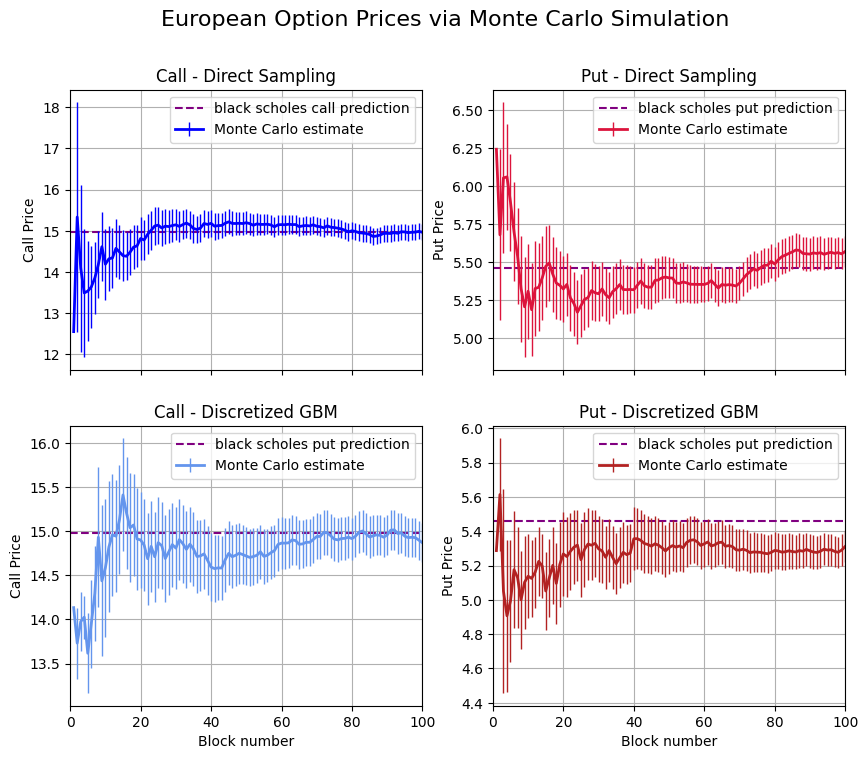

In [ ]:
#input data:
df = pd.read_csv("EuropeanOptions.dat", delim_whitespace=True, header=None, names=["C_direct", "err_C_direct", "P_direct", "err_P_direct", "C_discrete", "err_C_discrete", "P_discrete", "err_P_discrete"])
steps = np.arange(1, len(df)+1)

#plot:
fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True)
ax = ax.flatten()

titles = ["Call - Direct Sampling", "Put - Direct Sampling", "Call - Discretized GBM", "Put - Discretized GBM"]
ylabels = ["Call Price", "Put Price", "Call Price", "Put Price"]
data = [("C_direct", "err_C_direct"), ("P_direct", "err_P_direct"), ("C_discrete", "err_C_discrete"), ("P_discrete", "err_P_discrete")]
colors = ["blue", "crimson", "cornflowerblue", "firebrick"]

ax[0].axhline(call, color = 'purple', label = 'black scholes call prediction', linestyle = '--')
ax[2].axhline(call, color = 'purple', label = 'black scholes put prediction', linestyle = '--')
ax[1].axhline(put, color = 'purple', label = 'black scholes put prediction', linestyle = '--')
ax[3].axhline(put, color = 'purple', label = 'black scholes put prediction', linestyle = '--')

for i in range(4):
    y = df[data[i][0]]
    yerr = df[data[i][1]]

    ax[i].errorbar(steps,y,yerr=yerr, color = colors[i], label="Monte Carlo estimate", linewidth=2, elinewidth=1)
    ax[i].set(title=titles[i], ylabel=ylabels[i])
    ax[i].grid()
    ax[i].set_xlim(0, 100)
    ax[i].legend()

for a in ax[2:]:
    a.set(xlabel="Block number")

plt.suptitle("European Option Prices via Monte Carlo Simulation", fontsize=16)
plt.show()

Both prediction are compatible with the analytical solution, and with eachother!